### Aim
to identify the potential customers who have a higher probability of purchasing the loan.

### Objective

- To predict whether a liability customer will buy a personal loan or not.
- Which variables are most significant.
- Which segment of customers should be targeted more.

#### import required packages

In [164]:
import pandas as pd # to load the data
import numpy as np #pandas is built on numpy; imported in case of any computation
import matplotlib.pyplot as plt # for visualization
import seaborn as sns # for visualization
from sklearn.model_selection import train_test_split 
# train_test_split is function to split the data into train and test data
from sklearn.preprocessing import  StandardScaler, MinMaxScaler 
from sklearn.linear_model import LinearRegression
# this is the model we want to build
from sklearn.metrics import accuracy_score, mean_squared_error, r2_score, mean_absolute_error

### Loading and Exploring the data

#### load the dataset

In [165]:
path = "Loan_Modelling.csv"
data = pd.read_csv(path)
data.head()

,ID,Age,Experience,Income,ZIPCode,Family,CCAvg,Education,Mortgage,Personal_Loan,Securities_Account,CD_Account,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1


* ID: Customer ID
* Age: Customer’s age in completed years
* Experience: #years of professional experience
* Income: Annual income of the customer (in thousand dollars)
* ZIP Code: Home Address ZIP code.
* Family: the Family size of the customer
* CCAvg: Average spending on credit cards per month (in thousand dollars)
* Education: Education Level. 1: Undergrad; 2: Graduate;3: Advanced/Professional
* Mortgage: Value of house mortgage if any. (in thousand dollars)
* Personal_Loan: Did this customer accept the personal loan offered in the last campaign?
* Securities_Account: Does the customer have securities account with the bank?
* CD_Account: Does the customer have a certificate of deposit (CD) account with the bank?
* Online: Do customers use internet banking facilities?
* CreditCard: Does the customer use a credit card issued by any other Bank (excluding All life Bank)?

In [166]:
data.shape

(5000, 14)

- the data has 500 rows and 14 columns

In [167]:
data.columns

Index(['ID', 'Age', 'Experience', 'Income', 'ZIPCode', 'Family', 'CCAvg',
       'Education', 'Mortgage', 'Personal_Loan', 'Securities_Account',
       'CD_Account', 'Online', 'CreditCard'],
      dtype='object')

In [168]:
## dropping irrelevant columns
data = data.drop(['ID', 'ZIPCode'], axis=1)

data.columns

Index(['Age', 'Experience', 'Income', 'Family', 'CCAvg', 'Education',
       'Mortgage', 'Personal_Loan', 'Securities_Account', 'CD_Account',
       'Online', 'CreditCard'],
      dtype='object')

In [169]:
## Descriptive statistics
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,5000.0,45.338400,11.463166,23.0,35.0,45.0,55.0,67.0
Experience,5000.0,20.104600,11.467954,-3.0,10.0,20.0,30.0,43.0
Income,5000.0,73.774200,46.033729,8.0,39.0,64.0,98.0,224.0
Family,5000.0,2.396400,1.147663,1.0,1.0,2.0,3.0,4.0
CCAvg,5000.0,1.937938,1.747659,0.0,0.7,1.5,2.5,10.0
Education,5000.0,1.881000,0.839869,1.0,1.0,2.0,3.0,3.0
Mortgage,5000.0,56.498800,101.713802,0.0,0.0,0.0,101.0,635.0
Personal_Loan,5000.0,0.096000,0.294621,0.0,0.0,0.0,0.0,1.0
Securities_Account,5000.0,0.104400,0.305809,0.0,0.0,0.0,0.0,1.0
CD_Account,5000.0,0.060400,0.238250,0.0,0.0,0.0,0.0,1.0


In [170]:
# Check for missing values
data.isnull().sum()


Age                   0
Experience            0
Income                0
Family                0
CCAvg                 0
Education             0
Mortgage              0
Personal_Loan         0
Securities_Account    0
CD_Account            0
Online                0
CreditCard            0
dtype: int64

- no missing values

### visualize the data

In [171]:
list(data)

['Age',
 'Experience',
 'Income',
 'Family',
 'CCAvg',
 'Education',
 'Mortgage',
 'Personal_Loan',
 'Securities_Account',
 'CD_Account',
 'Online',
 'CreditCard']

<function matplotlib.pyplot.tight_layout(*, pad=1.08, h_pad=None, w_pad=None, rect=None)>

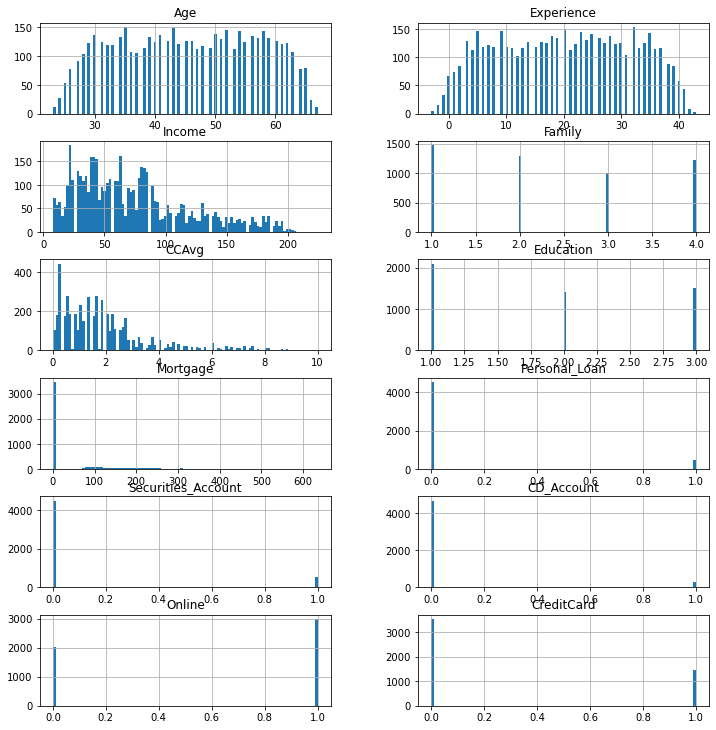

In [172]:
columns = list(data)
data[columns].hist(stacked = False, bins = 100, figsize = (12,30),
                 layout = (14,2) )
plt.tight_layout# to prevent title from overlapping;

- Age and Experience are normally distributed
- income and CCAvg are right skewed

### Identify the correlation

In [173]:
mat_corr = data.corr()
mat_corr

,Age,Experience,Income,Family,CCAvg,Education,Mortgage,Personal_Loan,Securities_Account,CD_Account,Online,CreditCard
Age,1.000000,0.994215,-0.055269,-0.046418,-0.052012,0.041334,-0.012539,-0.007726,-0.000436,0.008043,0.013702,0.007681
Experience,0.994215,1.000000,-0.046574,-0.052563,-0.050077,0.013152,-0.010582,-0.007413,-0.001232,0.010353,0.013898,0.008967
Income,-0.055269,-0.046574,1.000000,-0.157501,0.645984,-0.187524,0.206806,0.502462,-0.002616,0.169738,0.014206,-0.002385
Family,-0.046418,-0.052563,-0.157501,1.000000,-0.109275,0.064929,-0.020445,0.061367,0.019994,0.014110,0.010354,0.011588
CCAvg,-0.052012,-0.050077,0.645984,-0.109275,1.000000,-0.136124,0.109905,0.366889,0.015086,0.136534,-0.003611,-0.006689
Education,0.041334,0.013152,-0.187524,0.064929,-0.136124,1.000000,-0.033327,0.136722,-0.010812,0.013934,-0.015004,-0.011014
Mortgage,-0.012539,-0.010582,0.206806,-0.020445,0.109905,-0.033327,1.000000,0.142095,-0.005411,0.089311,-0.005995,-0.007231
Personal_Loan,-0.007726,-0.007413,0.502462,0.061367,0.366889,0.136722,0.142095,1.000000,0.021954,0.316355,0.006278,0.002802
Securities_Account,-0.000436,-0.001232,-0.002616,0.019994,0.015086,-0.010812,-0.005411,0.021954,1.000000,0.317034,0.012627,-0.015028
CD_Account,0.008043,0.010353,0.169738,0.014110,0.136534,0.013934,0.089311,0.316355,0.317034,1.000000,0.175880,0.278644


<AxesSubplot:>

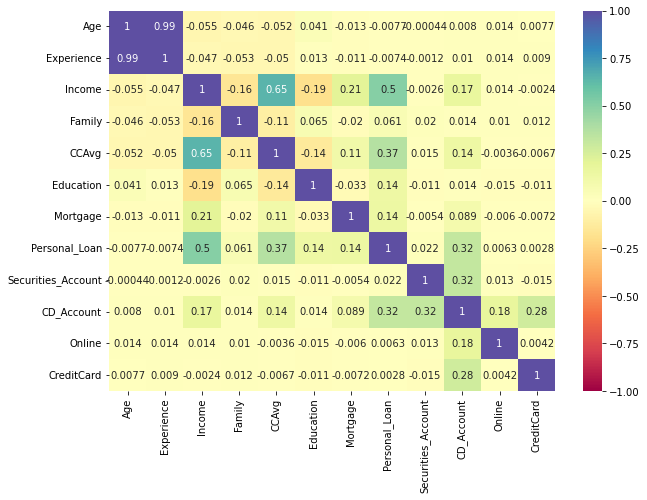

In [174]:
import seaborn as sns
plt.figure(figsize = (10,7))
sns.heatmap(mat_corr, annot= True, vmin = -1, vmax = 1, cmap ="Spectral")

- income is moderately correlated with personal loan
- experience and age are highly correlated; however, multicolinearity can be prevented by the hyperparemeters in classification models such as penalty l1 and l2

In [175]:
data["Personal_Loan"].value_counts()

0    4520
1     480
Name: Personal_Loan, dtype: int64

In [176]:
data["Personal_Loan"].value_counts(normalize= True)

0    0.904
1    0.096
Name: Personal_Loan, dtype: float64

- The data is imbalanced

In [177]:
### splitting the data

from sklearn.model_selection import train_test_split
X = data.drop("Personal_Loan", axis = 1)
y = data["Personal_Loan"]

In [178]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = 0.2,
                                                   random_state = 0, stratify= y)

# stratify is always the name of target i.e. y

In [179]:
y_train.value_counts(normalize = True)

0    0.904
1    0.096
Name: Personal_Loan, dtype: float64

# 1. Logistic regression model

In [180]:
### Normalize the data
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x_train_sd = scaler.fit_transform(x_train)
x_test_sd = scaler.transform(x_test)

from sklearn.linear_model import LogisticRegression
log_reg = LogisticRegression()
log_reg.fit(x_train_sd, y_train)

LogisticRegression()

In [181]:
# check for accuracy
print("Train Performance: {:.3f}".format(log_reg.score(x_train_sd, y_train)))
print("Test Performance: {:.3f}".format(log_reg.score(x_test_sd, y_test)))

Train Performance: 0.952
Test Performance: 0.952


- if we have a data with similar distribution, this model will correctly predict whether a customer accepted personal loan or not 95% of the time
- in reality, we are not sure if this performance is realiable. If we have an imbalanced data, accuracy is not the best metric to use to interpret the data. In fact it could be the worse because The module can be very accurate but actually, it is only accurate on the majority class. It is only predicting well those classes that occur the most i.e. those that did not accept loan. This is where performance metrics like confusion matrix, precision, recall, f1 come in - for imbalanced data

In [182]:
log_reg.coef_

array([[-0.34817482,  0.48452808,  2.43433296,  0.74535843,  0.20175861,
         1.39798676, -0.02172319, -0.25721167,  0.85035746, -0.29475415,
        -0.48343456]])

In [183]:
### Precision
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, classification_report, confusion_matrix
test_preds = log_reg.predict(x_test_sd)
precision = precision_score(y_test, test_preds)
precision

0.8333333333333334

- out of all the customers predicted to accept personal loan, 83 percent were predicted correctly while 16.7% of them were wrongly predicted to purchase personal loan (False Positive)

In [184]:
### Recall
recall = recall_score(y_test, test_preds)
recall

0.625

- out of all the actual customers that purchased personal loan, the model predicted only 62.5 percent correctly. 37.5% who also purchaced personal loan were missed out by the model (False Negative)

#### Logistic regression model improvement

In [185]:
# function to train a model and compute train accuracy

def train(model, X, y):
    """
    function to train the model and compute accuracy
    model: model that is not yet trained
    X: train features
    y: train target
    """
    trained_model = model.fit(X, y) # training the model
    preds = trained_model.predict(X) # making predictions
    acc = accuracy_score(y, preds) # computing accuracy
    print(f"Train Accuracy {acc}") # printing the accuracy
    return trained_model # allows the function to return a trained model

In [186]:
# function to compute different metrics to check performance of a regression model
def model_performance_classification(model, predictors, target, threshold = 0.5):
    """
    Function to compute different metrics to check regression model performance

    model: classifier
    predictors: independent variables
    target: dependent variable
    """

    # predicting using the independent variables
    pred_proba = model.predict_proba(predictors)[:, 1]
    # convert the probability to class
    pred_class = np.round(pred_proba > threshold)
    acc = accuracy_score(target, pred_class)  # to compute acuracy
    recall = recall_score(target, pred_class)  # to compute recall
    precision = precision_score(target, pred_class)  # to compute precision
    f1 = f1_score(target, pred_class)  # to compute F1 score

    # creating a dataframe of metrics
    df_perf = pd.DataFrame(
        {
            "Accuracy": acc,
            "Recall": recall,
            "Precision": precision,
            "F1-score": f1,
        },
        index=[0],)
    conf = confusion_matrix(target, pred_class)
    plt.figure(figsize=(8, 5))
    sns.heatmap(conf, annot=True, fmt="g")
    plt.xlabel("Predicted label")
    plt.ylabel("Actual label")
    plt.show()
 
    return df_perf

In [187]:
# import required metrics
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.metrics import (precision_score,
                            recall_score,
                            f1_score,
                            accuracy_score,
                            precision_recall_curve,
                            roc_auc_score,
                            ConfusionMatrixDisplay,
                            confusion_matrix,
                            roc_curve)

In [188]:
# function to evaluate the model and compute metrics on test data

def evaluate(model, X, y, threshold = 0.5):
    """
    function to evaluate our trained model with different metrics
    model: trained model(classifier)
    X: validation features
    y: target in validation data
    threshold: value to filter prediction
    
    """
    pred_proba= model.predict_proba(X)[:, 1] 
    # : means all the rows 
    # 1 means interested in those with diabetes
    # we can convert probability to 0 or 1
    # any probability less than 0.5 will be 0
    # any probalility greater than 0.5 will be 1
   
    pred_class = np.round(pred_proba > threshold) # convert 0 0r 1
    # remember True is 1;False is 0
    
    acc= accuracy_score(y, pred_class)
    recall= recall_score(y, pred_class)
    precision= precision_score(y, pred_class)
    f1= f1_score(y, pred_class)
    
    df = pd.DataFrame({
        "Accuracy":acc,
        "Precision":precision,
        "Recall":recall,
        "F1": f1
    }, index = [0])
    
    conf = confusion_matrix(y, pred_class, labels = [0,1]) # we have just 2 labels
    disp = ConfusionMatrixDisplay(conf, display_labels = [0,1]) 
    disp.plot() # to display confusion matrix
    plt.show()
    
    return df 

In [189]:
# function to train a model and compute train accuracy

def train(model, X, y):
    """
    function to train the model and compute accuracy
    model: model that is not yet trained
    X: train features
    y: train target
    """
    trained_model = model.fit(X, y) # training the model
    preds = trained_model.predict(X) # making predictions
    acc = accuracy_score(y, preds) # computing accuracy
    print(f"Train Accuracy {acc}") # printing the accuracy
    return trained_model # allows the function to return a trained model

In [190]:
# checking for model performance using our functions
log_reg_model = train(log_reg, x_train_sd, y_train)

Train Accuracy 0.95225


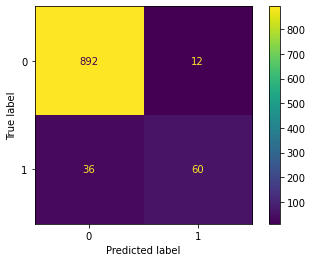

,Accuracy,Precision,Recall,F1
0,0.952,0.833333,0.625,0.714286


In [191]:
log_reg_df = evaluate(log_reg_model, x_test_sd, y_test)
log_reg_df

- accuracy is 95%
- recall is 62.5 - out of all the actual customers that purchased personal loan, the model predicted only 62.5 percent correctly
- precision is 83%: out of all the customers predicted to take loan, 83 percent were predicted correctly

#### ROC-AUC (Receiver Operating Characteristic- Area Under the Curve)
it uses score and the goal is to measure how well the model is doing in terms of distinguishing between the two major classes

In [192]:
preds = log_reg.predict_proba(x_test_sd)[:,1]
roc = roc_auc_score(y_test, preds)
roc

0.9630346607669616

<function matplotlib.pyplot.show(close=None, block=None)>

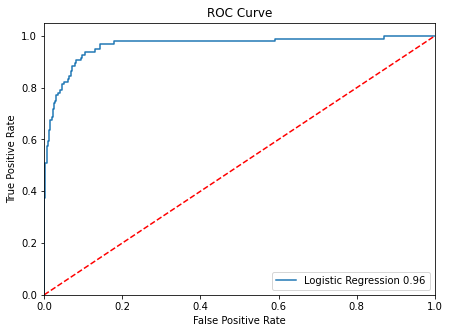

In [193]:
fpr, tpr, thre = roc_curve(y_test, preds)
auc = roc_auc_score(y_test, preds)
plt.figure(figsize = (7,5))
plt.plot(fpr, tpr, label = f"Logistic Regression {auc:.2f}")
plt.plot([0,1],[0,1],"r--")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend(loc = "lower right")
plt.show

- roc curve gives a measure of how well the model will distinguish btw the 2 classes
- roc curve also give the measure of the threshold that it uses
- our duty is to select the best threshold
- the best or optimal threshold is where the difference btw the tpr and fpr is very high
- we need the point where tpr and fpr are very far from each other

In [194]:
thre

array([1.99886189e+00, 9.98861886e-01, 8.81290456e-01, 8.49129012e-01,
       7.16706706e-01, 6.97252813e-01, 6.68002201e-01, 6.47362622e-01,
       6.32216851e-01, 6.29207117e-01, 5.88328209e-01, 5.82305988e-01,
       5.75599590e-01, 5.60503347e-01, 5.32066811e-01, 5.14991286e-01,
       4.94970595e-01, 4.85560301e-01, 4.68237979e-01, 4.57710807e-01,
       4.50411761e-01, 4.14667768e-01, 4.06943434e-01, 3.89261011e-01,
       3.89035076e-01, 3.79445655e-01, 3.63876853e-01, 3.62206696e-01,
       3.61335313e-01, 3.53575871e-01, 3.52774250e-01, 3.35958665e-01,
       3.35781637e-01, 3.22247739e-01, 3.16329739e-01, 2.88451551e-01,
       2.85750370e-01, 2.67627987e-01, 2.64290701e-01, 2.44347203e-01,
       2.37061590e-01, 2.30525709e-01, 2.29233351e-01, 2.09547400e-01,
       2.08458850e-01, 2.06604129e-01, 2.02656382e-01, 1.88653632e-01,
       1.87120726e-01, 1.83336462e-01, 1.82126573e-01, 1.80515437e-01,
       1.79511259e-01, 1.73667617e-01, 1.72742194e-01, 1.61132008e-01,
      

In [195]:
## Improment using metrics

optimal_index= np.argmax(tpr - fpr)
# argmax gives the position where the maximum difference occurs
# we can use the position to filter the thre and obtain the optimal threshold
optimal_index

64

- Position 64 is the position of the optimal threshold we are interested in

In [196]:
optimal_thre = thre[optimal_index]
optimal_thre

0.0935340030448138

- 0.0935340030448138 is the optimal threshold
- initially, when building the model, we used threshold of 0.5
- hence, there are chances that the threshold we use is too high
- we can now rebuild the model by changing the threshold

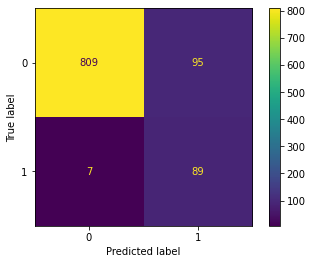

,Accuracy,Precision,Recall,F1
0,0.898,0.483696,0.927083,0.635714


In [197]:
evaluate(log_reg, x_test_sd, y_test, threshold = optimal_thre)

- using the optimal threshold improves the recall but precision value reduced
- this is a great performance provided the organization's goal is to optimize false negative

#### 2. Use of Model Hyperparameters
1. C: regularization parameter, the smaller the value of C, the more the strength of regularization; this reduces the coefficient associated with feautures. However, if the coefficients are very small, the model will be too simple.

2. class weight: to balance the minority and majority classes

In [198]:
# let's generate random values of c  
c_values = np.random.rand(5,2).flatten()

accs = []

for c in c_values:
    model = LogisticRegression(C =c)
    model.fit(x_train_sd, y_train)
    acc= model.score(x_test_sd, y_test)
    accs.append(acc)
    
accs

[0.952, 0.952, 0.952, 0.952, 0.952, 0.952, 0.952, 0.953, 0.952, 0.952]

In [199]:
optimal_idx = np.argmax(accs)
optimal_c = c_values[optimal_idx]
optimal_c

0.07692164323567052

Train Accuracy 0.951


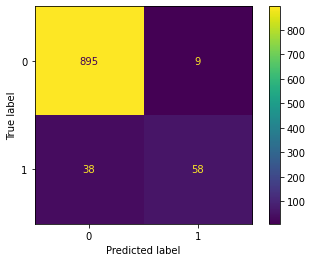

,Accuracy,Precision,Recall,F1
0,0.953,0.865672,0.604167,0.711656


In [200]:
# rebuilding the model using our optimal c
log_reg_c = LogisticRegression(random_state =0, C  = optimal_c)
log_reg_c_model = train(log_reg_c, x_train_sd, y_train)
df_c = evaluate(log_reg_c_model, x_test_sd, y_test)
df_c

- tweaking the value of C slightly increased the precision perfromance and reduced the recall
- this is a great performance provided the company's goal is to optimize false positive

#### 3. Model Improvement from the aspect of data - Balancing of data
- Oversampling
- undersampling

In [201]:
# pip install imblearn
from imblearn.over_sampling import ADASYN, SMOTE,RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler

In [202]:
def balance_data(X, y, smote_type):
# only balancing the training data because in reality you cant balance an unseen data.
# if you balance your test data and you have a good result, you mmight be surprised at the performance on unseen data
    """
    X = train features
    y = train target
    smote_type: kind of imbalance strategy
    
    """
    X_res, y_res = smote_type.fit_resample(X, y )
    # X_res = resampled features
    # y_res = resampled target
    # resample = deals with generation of artificial data
    
    return X_res, y_res


In [203]:
# set the seed
under = RandomUnderSampler(random_state =0) 
over = RandomOverSampler(random_state =0) 
smote = SMOTE(random_state= 0)
adasyn = ADASYN(random_state= 0)

x_train_un, y_train_un = balance_data(x_train_sd , y_train, under)
x_train_ov, y_train_ov = balance_data(x_train_sd , y_train, over)
x_train_sm, y_train_sm = balance_data(x_train_sd , y_train, smote)
x_train_ada, y_train_ada = balance_data(x_train_sd , y_train, adasyn)

In [204]:
# pip install collections

# undersampling
from collections import Counter
Counter(y_train_un)

Counter({0: 384, 1: 384})

- both minority and majority classes are the same now

Train Accuracy 0.89453125


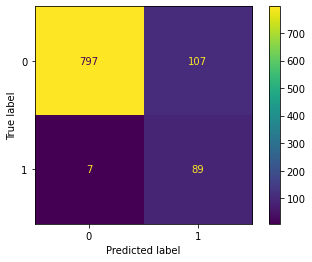

,Accuracy,Precision,Recall,F1
0,0.886,0.454082,0.927083,0.609589


In [205]:
# Undersampling

log_reg_un = train(log_reg, x_train_un, y_train_un)
# using our initial logistic regression model
df_un = evaluate(log_reg_un,x_test_sd, y_test)
df_un

- undersampling improves recall but negatively affects the precision

Train Accuracy 0.8940818584070797


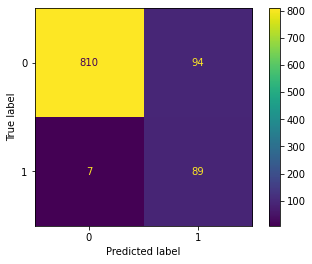

,Accuracy,Precision,Recall,F1
0,0.899,0.486339,0.927083,0.637993


In [206]:
# Oversampling

log_reg_ov = train(log_reg, x_train_ov, y_train_ov)
# using our initial logistic regression model
df_ov = evaluate(log_reg_ov,x_test_sd, y_test)
df_ov

- result is similar to that of undersampling

Train Accuracy 0.9070796460176991


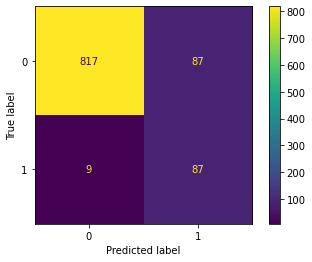

,Accuracy,Precision,Recall,F1
0,0.904,0.5,0.90625,0.644444


In [207]:
# smote
log_reg_sm = train(log_reg, x_train_sm, y_train_sm)
# using our initial logistic regression model
df_sm = evaluate(log_reg_sm,x_test_sd, y_test)
df_sm

- SMOTE improves only recall

Train Accuracy 0.8801773098767143


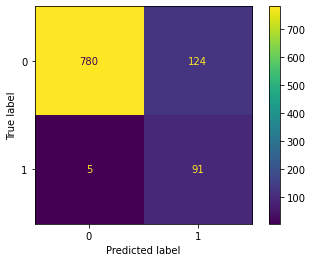

,Accuracy,Precision,Recall,F1
0,0.871,0.423256,0.947917,0.585209


In [208]:
log_reg_ada = train(log_reg, x_train_ada, y_train_ada)
# using our initial logistic regression model
df_ada = evaluate(log_reg_ada,x_test_sd, y_test)
df_ada

- also improves only the recall and has the best performance on recall
-  in terms of Recall ADASYN performed the best

# 2. Tree based models

In [209]:
# instatiate the model
dtree = DecisionTreeClassifier(random_state = 0)
# criterion: the function to measure the quality of split 
# gini: the default criterion; for gini impurity
# entropy: for information gain

In [210]:
# split into train, validation and test
# this is how our data should be split in most cases
# all the hyperparameter tuning will be done on validation data
# test data is the standard
x_train_val, x_test, y_train_val, y_test = train_test_split(X, y, test_size = 0.2,
                                                            random_state = 0,
                                                           stratify = y)
x_train, x_val, y_train, y_val = train_test_split(x_train_val, y_train_val,
                                                 test_size = 0.2,
                                                 random_state = 0,
                                                 stratify = y_train_val)

In [211]:
dtree_model = train(dtree,x_train, y_train)

Train Accuracy 1.0


- the 100 percent in the training accuracy is a clear indication of overfitting


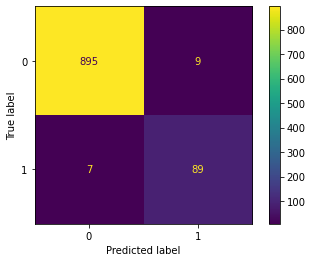

,Accuracy,Precision,Recall,F1
0,0.984,0.908163,0.927083,0.917526


In [212]:
dtree_df = evaluate(dtree_model, x_test, y_test)
dtree_df

- both precision and recall performance are high

In [213]:
# Define a function to plot the decision tree
# get the feature names
feat_names = list(X.columns)

def plot_decision_tree(dec_tree):
    plt.figure(figsize = (20,30))
    tree.plot_tree(dtree_model, feature_names = feat_names, class_names =True,
                  filled = True, node_ids = True, fontsize =9)
    plt.show()

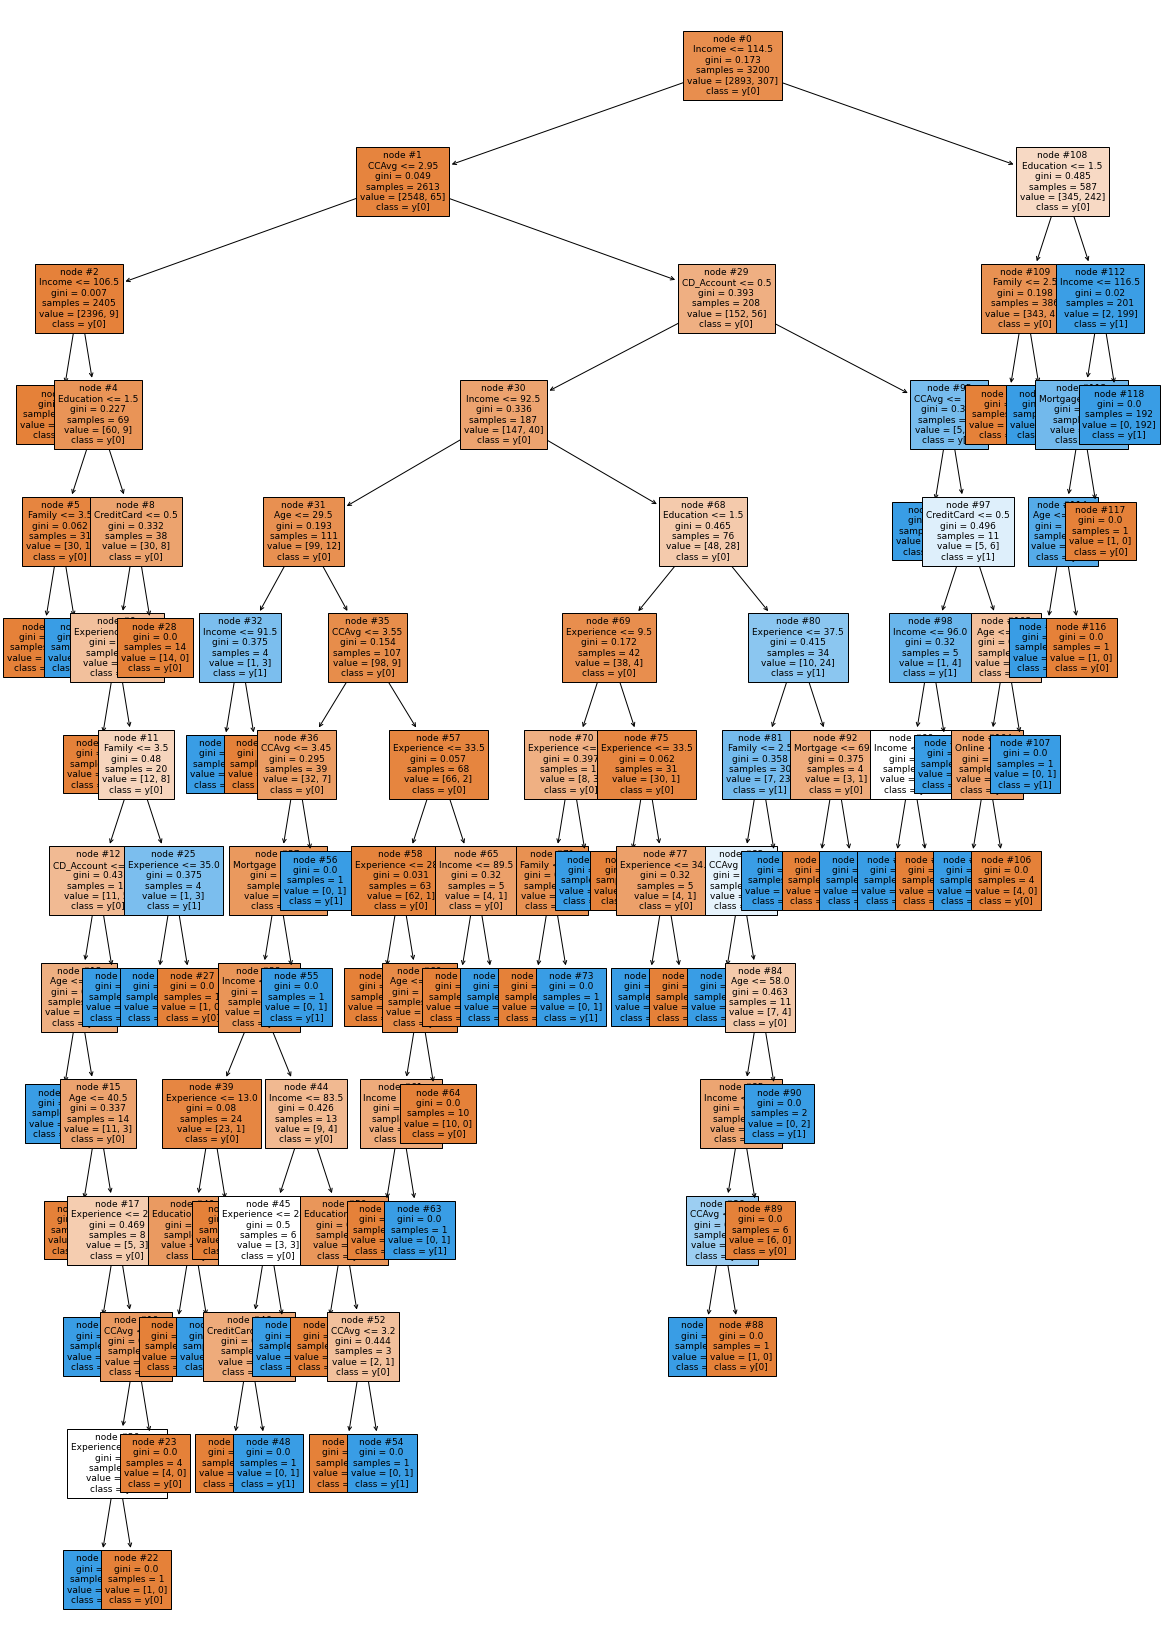

In [214]:
plot_decision_tree(dtree_model)

### model improvement

In [215]:
# Apply pre-pruning by using max_depth of 4 for instance
dtree2 = DecisionTreeClassifier(random_state = 0, class_weight = {0:0.1, 1:0.9},
                               max_depth = 4)
# the majority class was given 0.1
# the minority class was given 0.9

# train the model
dtree2_model = train(dtree2, x_train, y_train)
dtree2_model

Train Accuracy 0.9509375


DecisionTreeClassifier(class_weight={0: 0.1, 1: 0.9}, max_depth=4,
                       random_state=0)

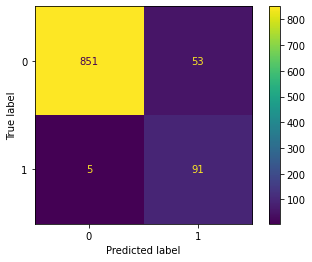

,Accuracy,Precision,Recall,F1
0,0.942,0.631944,0.947917,0.758333


In [216]:
# evaluate on the training and test set

dtree2_df = evaluate(dtree2_model, x_test, y_test)
dtree2_df

- pre-prunning reduces the precision but increase the performance of recall

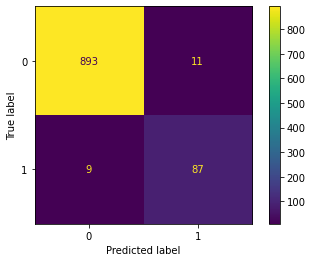

,Accuracy,Precision,Recall,F1
0,0.98,0.887755,0.90625,0.896907


In [217]:
test = evaluate(dtree2_model, x_test, y_test, threshold = 0.9)
#increasing the threshold optimizes/ improves the precision on decision tree
test

- increasing the threshold improves the performance of the model; however the model performed better initially without tweaking the hyperparameters

### Feature importances

In [218]:
dtree2_model.feature_importances_

array([0.        , 0.        , 0.66264062, 0.13537696, 0.096907  ,
       0.10090131, 0.        , 0.        , 0.00417412, 0.        ,
       0.        ])

In [219]:
## Plot feature importances
importances = dtree2_model.feature_importances_
def plot_importances(importances):
    indices = np.argsort(importances)
    
    plt.figure(figsize = (12,12))
    plt.title("Feature Importances")
    plt.barh(range(len(indices)), importances[indices], color ="violet",
            align = "center")
    plt.yticks(range(len(indices)),[feat_names[i] for i in indices])
    plt.xlabel("Relative Importances")
    plt.show()

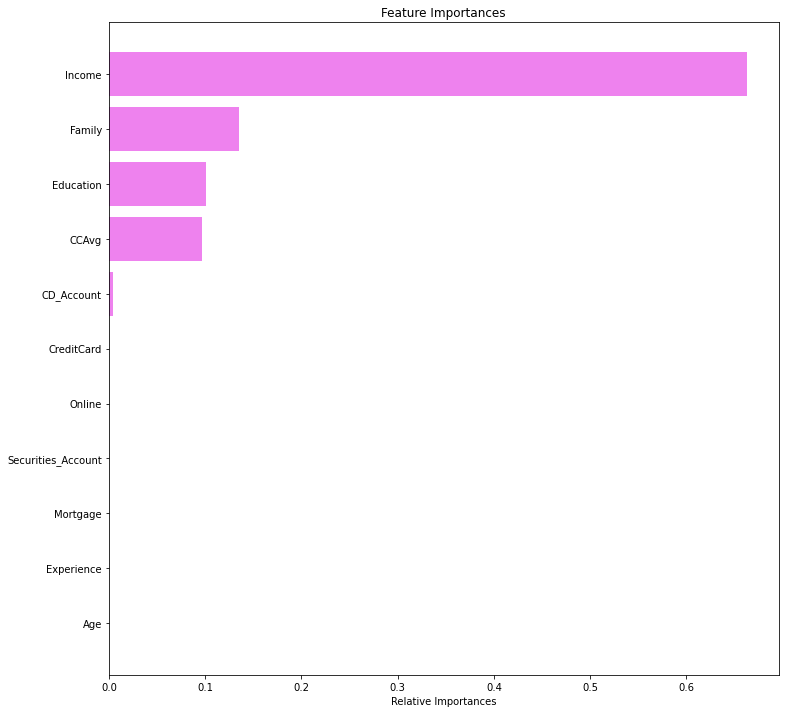

In [220]:
plot_importances(importances)

- income is the most important feature that determines if a client will apply for loan or not. Other important features include family and education
- we can now rebuild our model by dropping online, securities account, mortgage, experience and age columns since they add no value to the model 

# 3. Ensembles of Decision Trees - Random Forest

In [221]:
# import the random forest model
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier

# instanntiate the classifier
rf = RandomForestClassifier(random_state = 0, n_jobs = -1)
# estimator; by default, it trains 100 trees
# n_jobs; for it to use all the cpu core; to facilitate it

# train the model
rf_model = train(rf, x_train, y_train)

# performance scores
rf_model


Train Accuracy 1.0


RandomForestClassifier(n_jobs=-1, random_state=0)

- the model overfits; let's pre-prune by setting class_weight and max_depth

In [222]:
# create another model using max_depth to prevent overfitting
# import the random forest model
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier

# instantiate the classifier
rf = RandomForestClassifier(random_state = 0, n_jobs = -1,max_depth = 4,class_weight={0:0.15, 1:0.90})
# estimator; by default, it trains 100 trees
# n_jobs; for it to use all the cpu core; to facilitate it

# train the model
rf_model = train(rf, x_train, y_train)

# performance scores
rf_model


Train Accuracy 0.9771875


RandomForestClassifier(class_weight={0: 0.15, 1: 0.9}, max_depth=4, n_jobs=-1,
                       random_state=0)

- train accuracy is 97.7 percent. This the highest accuracy recorded

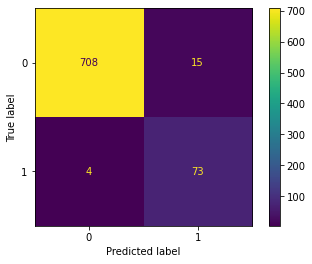

,Accuracy,Precision,Recall,F1
0,0.97625,0.829545,0.948052,0.884848


In [223]:
# evaluate the model
rf_df = evaluate(rf_model, x_val, y_val)
rf_df

- out of all the customers predicted to purchase loan, the random forest model predicted 83% correctly
- out of the actual customers that purchased loan, the model correctly predicted 95% correctly while 5% who purchased loan were missed out (False Negative)
- this is a good performance; however there is need to improve the model to see if it can perform better than this

### Visualizing feature importances for the Random Forests Algorithm

In [224]:
rf_imp = rf_model.feature_importances_
rf_imp

array([0.00770252, 0.00519888, 0.48685866, 0.04162364, 0.24919777,
       0.09395279, 0.03658455, 0.00192293, 0.07380755, 0.00117195,
       0.00197875])

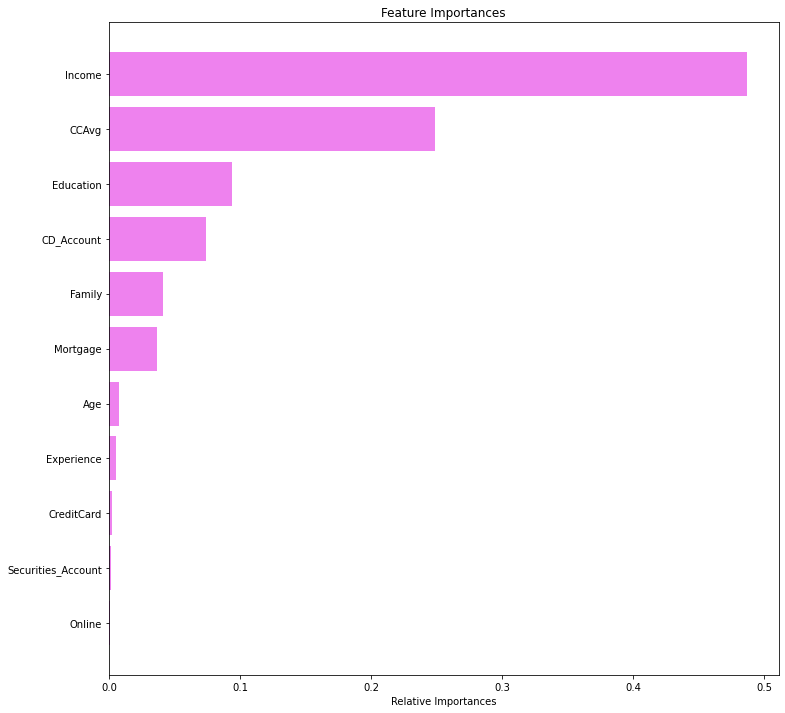

In [225]:
plot_importances(rf_imp)

- the random forest model validates that the income is the most important feature in the model as predicted by the decision tree
- based on the random forest, CCAvg and education are more important in predicting the outcome and generating patterns than the family column as opposed by the decision tree
- the random forest was able to extract a very small amount of information from age, experience and credit card columns which the decision tree ignored
- both securities_account and online added no value to the two model; hence they can be removed when creating the final model to make our model less complex

# 4. Ensembles of Decision Trees - Gradient Boosting

In [226]:
# import the gradient boosting model
from sklearn.ensemble import GradientBoostingClassifier

# instantiate the classifier
gb = GradientBoostingClassifier(random_state= 0)
# learning_rate; how strongly you want the mistake to be corrected

# train the model
gb_model = train(gb, x_train, y_train)

# performance scores

Train Accuracy 0.9953125


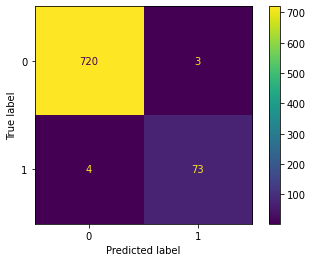

,Accuracy,Precision,Recall,F1
0,0.99125,0.960526,0.948052,0.954248


In [227]:
# evaluate
gb_df = evaluate(gb_model, x_val, y_val)
gb_df

- both recall and precision are high

#### tuning the hyperparameter in gradient boosting

In [228]:
# loop through the combination values of both parameters
best_score = 0
for lr in [0.001, 0.01, 0.1, 1, 10]:
    for md in range(1, 5): # trying max_depth of 1, 2, 3 and 4
        # lr = learning rate
        # md = max_depth
        # we have 2 for loops since we are only trying 2 hyperparameters
        # 5 lr value and 4 md values will run 20 times
        gb = GradientBoostingClassifier(random_state=0, learning_rate=lr, max_depth=md)
        gb.fit(x_train, y_train)
        score = gb.score(x_val, y_val)
        
        if score > best_score:
            best_score = score
            best_parameters = {'Learning_rate': lr, 'Max_depth': md}

print("Best score: {}".format(best_score))
print("Best parameters: {}".format(best_parameters))

Best score: 0.99375
Best parameters: {'Learning_rate': 0.1, 'Max_depth': 4}


In [231]:
# import the gradient boosting model
from sklearn.ensemble import GradientBoostingClassifier

# instantiate the classifier
gb = GradientBoostingClassifier(random_state= 0, max_depth = 4, learning_rate=0.1 )
# learning_rate; how strongly you want the mistake to be corrected

# train the model
gb_model = train(gb, x_train, y_train)

# performance scores

Train Accuracy 0.9996875


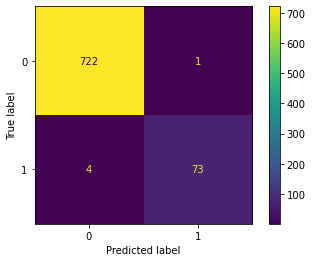

,Accuracy,Precision,Recall,F1
0,0.99375,0.986486,0.948052,0.966887


In [232]:
# evaluate
gb_df = evaluate(gb_model, x_val, y_val)
gb_df

### Visualizing feature importances for the Gradient Boosting Algorithm

In [233]:
gb_imp = gb_model.feature_importances_
gb_imp

array([9.01795092e-03, 7.15311345e-03, 3.96989762e-01, 1.43109307e-01,
       8.26135050e-02, 3.36157674e-01, 3.94736464e-03, 1.17129908e-04,
       1.68407949e-02, 6.52413299e-04, 3.40098522e-03])

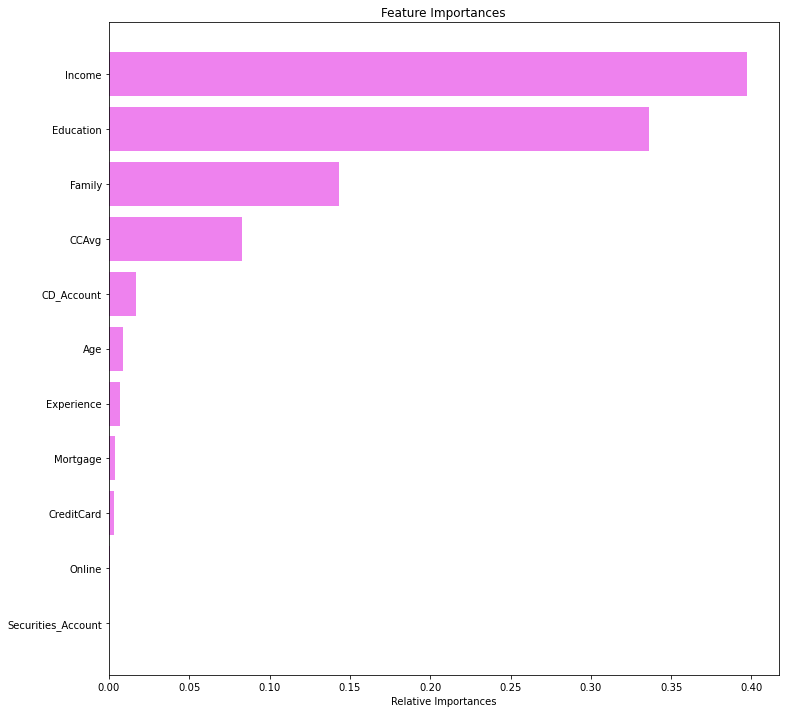

In [234]:
plot_importances(gb_imp)

- income, family and education are the most important features used by the gradient boosting classifiers in predicting whether a customer will accept loan or not
- both security account and online columns added no value to the model and can be removedwhen creating a final model so as to reduce the complexity of the model

## Conclusion and Recommendation
According to the models, the customers with higher incomes, education background and average spending on credit cards per month have more tendency to purchase personal loans; therefore the marketing campaign should target clients that belong to these categories more. <br>

Furthermore, either the gradient boosting classifier or the random forest model should be deployed for this project since they both have performed well on recall and precision with a satisfactory balance between the two